Epoch 0, Loss: 2.1710
Epoch 50, Loss: 2.1350
Epoch 100, Loss: 2.1064
Epoch 150, Loss: 2.0832
Epoch 200, Loss: 2.0639
Epoch 250, Loss: 2.0478


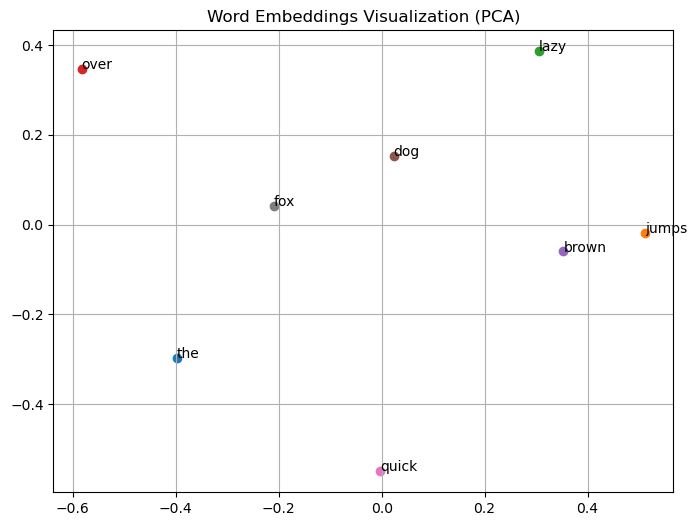

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample text
text = "the quick brown fox jumps over the lazy dog"
tokens = text.lower().split()
vocab = list(set(tokens))
word2idx = {word: i for i, word in enumerate(vocab)}
idx2word = {i: word for word, i in word2idx.items()}

# Generate skip-gram pairs
def generate_skipgram_pairs(text, window_size=2):
    pairs = []
    for i in range(len(text)):
        for j in range(i - window_size, i + window_size + 1):
            if i != j and 0 <= j < len(text):
                pairs.append((text[i], text[j]))
    return pairs

skipgram_pairs = generate_skipgram_pairs(tokens)

# Prepare input/output
def one_hot(idx, vocab_size):
    vec = torch.zeros(vocab_size)
    vec[idx] = 1.0
    return vec

X, Y = [], []
vocab_size = len(vocab)
for center, context in skipgram_pairs:
    X.append(one_hot(word2idx[center], vocab_size))
    Y.append(word2idx[context])

X = torch.stack(X)
Y = torch.tensor(Y)

# Define Skip-Gram model
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Linear(vocab_size, embedding_dim)
        self.output = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        x = self.embeddings(x)
        x = self.output(x)
        return x

# Training
embedding_dim = 10
model = SkipGram(vocab_size, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(300):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Visualize embeddings
with torch.no_grad():
    embeddings = model.embeddings.weight.T  # shape: [vocab_size, embedding_dim]
    embeddings = embeddings.numpy()
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
for i, word in enumerate(vocab):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("Word Embeddings Visualization (PCA)")
plt.grid(True)
plt.show()


In [3]:
#Visualization of Learned Embeddings
#We can extract the embedding layer and visualize the words in 2D using PCA or t-SNE:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get weights
embeddings = model.embeddings.weight.detach().numpy()
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
for i, word in enumerate(vocab):
    plt.scatter(reduced[i][0], reduced[i][1])
    plt.annotate(word, (reduced[i][0], reduced[i][1]))
plt.title("Word Embeddings Visualization")
plt.grid(True)
plt.show()

NameError: name 'model' is not defined

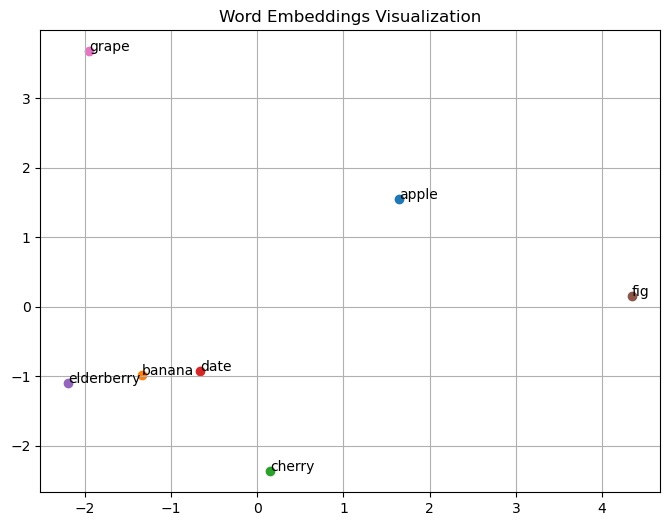

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dummy vocabulary
vocab = ['apple', 'banana', 'cherry', 'date', 'elderberry', 'fig', 'grape']
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# Define a simple embedding model
embedding_dim = 10  # You can change this
model = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embedding_dim)

# Get embeddings
with torch.no_grad():
    embeddings = model.weight.detach().numpy()

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))
for i, word in enumerate(vocab):
    plt.scatter(reduced[i][0], reduced[i][1])
    plt.annotate(word, (reduced[i][0], reduced[i][1]))
plt.title("Word Embeddings Visualization")
plt.grid(True)
plt.show()


In [ ]:
#assignment 
minimize loss
use another sentence and display

Epoch 50, Loss: 0.2312
Epoch 100, Loss: 0.2240
Epoch 150, Loss: 0.2264
Epoch 200, Loss: 0.2230
Epoch 250, Loss: 0.2238
Epoch 300, Loss: 0.2191
Epoch 350, Loss: 0.2167
Epoch 400, Loss: 0.2158
Epoch 450, Loss: 0.2184
Epoch 500, Loss: 0.2199


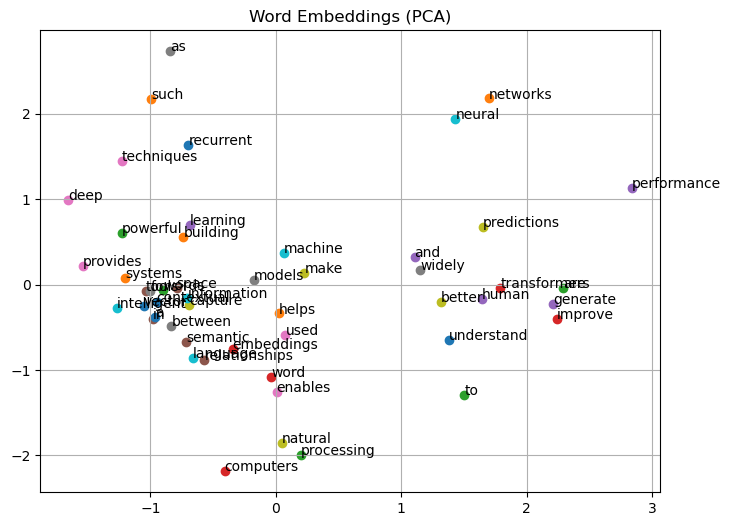

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

# Sample (larger) text
text = """
natural language processing enables computers to understand and generate human language 
machine learning provides powerful tools for building intelligent systems 
deep learning techniques such as recurrent neural networks and transformers are widely used 
word embeddings capture semantic relationships between words in a vector space 
contextual information helps models make better predictions and improve performance
""".lower().split()

vocab = list(set(text))
word2idx = {word: i for i, word in enumerate(vocab)}
idx2word = {i: word for word, i in word2idx.items()}
vocab_size = len(vocab)

# Generate skip-gram pairs
def generate_skipgram_pairs(tokens, window_size=2):
    pairs = []
    for i in range(len(tokens)):
        for j in range(i - window_size, i + window_size + 1):
            if j != i and 0 <= j < len(tokens):
                pairs.append((word2idx[tokens[i]], word2idx[tokens[j]]))
    return pairs

pairs = generate_skipgram_pairs(text, window_size=2)

# Model definition using nn.Embedding
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.output = nn.Linear(embedding_dim, vocab_size)

    def forward(self, center_words):
        embeds = self.embeddings(center_words)
        out = self.output(embeds)
        return out

# Hyperparameters
embedding_dim = 50
model = SkipGram(vocab_size, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 500
batch_size = 8

# Training loop
for epoch in range(epochs):
    random.shuffle(pairs)
    total_loss = 0
    for i in range(0, len(pairs), batch_size):
        batch = pairs[i:i+batch_size]
        center_batch = torch.tensor([pair[0] for pair in batch], dtype=torch.long)
        context_batch = torch.tensor([pair[1] for pair in batch], dtype=torch.long)

        optimizer.zero_grad()
        outputs = model(center_batch)
        loss = criterion(outputs, context_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(pairs):.4f}")

# Extract embeddings and visualize using PCA
with torch.no_grad():
    embeddings = model.embeddings.weight.cpu().numpy()
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
for i, word in enumerate(vocab):
    plt.scatter(reduced[i][0], reduced[i][1])
    plt.annotate(word, (reduced[i][0], reduced[i][1]))
plt.title("Word Embeddings (PCA)")
plt.grid(True)
plt.show()


In [ ]:
#word embadding
it overcomes the deficiencies of one hot vector
used in machine trenslations and naturaral language processing and syntemant analysis
having similar vectors for synonyms
we use gensim library


{'vehicle': 0, 'train': 1, 'bus': 2, 'car': 3, 'fruit': 4, 'orange': 5, 'banana': 6, 'apple': 7, 'germany': 8, 'berlin': 9, 'france': 10, 'paris': 11, 'woman': 12, 'man': 13, 'queen': 14, 'king': 15}
[-7.1909428e-03  4.2328904e-03  2.1633946e-03  7.4407146e-03
 -4.8892652e-03 -4.5643463e-03 -6.0981740e-03  3.2993674e-03
 -4.4994629e-03  8.5228849e-03 -4.2888271e-03 -9.1054197e-03
 -4.8163556e-03  6.4164903e-03 -6.3713240e-03 -5.2615367e-03
 -7.3044109e-03  6.0222615e-03  3.3575939e-03  2.8483903e-03
 -3.1385506e-03  6.0308911e-03 -6.1527453e-03 -1.9801008e-03
 -5.9830821e-03 -9.9568011e-04 -2.0209861e-03  8.4859459e-03
  7.8001023e-05 -8.5753258e-03 -5.4290984e-03 -6.8759858e-03
  2.6923812e-03  9.4566476e-03 -5.8159959e-03  8.2650259e-03
  8.5320519e-03 -7.0626391e-03 -8.8832127e-03  9.4691841e-03
  8.3743641e-03 -4.6908916e-03 -6.7260410e-03  7.8421365e-03
  3.7633455e-03  8.0955038e-03 -7.5715459e-03 -9.5250849e-03
  1.5774060e-03 -9.8057678e-03 -4.8858845e-03 -3.4601032e-03
  9.620

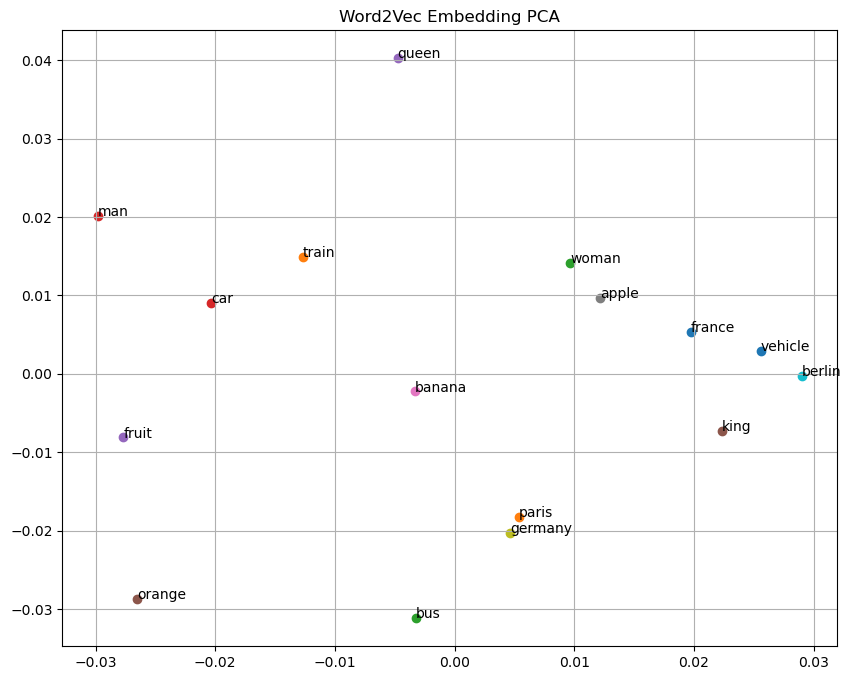

In [17]:
import gensim
from gensim.models import Word2Vec

corpus = [
    "king queen man woman",
    "paris france berlin germany",
    "apple banana orange fruit",
    "car bus train vehicle",
]

sentences = [sentence.lower().split() for sentence in corpus]

#Basic Word2Vec Training
#python
#Copy
#Edit

model = Word2Vec(sentences, vector_size=100, window=2, min_count=1, workers=4)

#Check Vocabulary
print(model.wv.key_to_index)

#Retrieve Word Vectors
print(model.wv['king'])

#Find Similar Words
model.wv.most_similar('king')

#Word Analogy
model.wv.most_similar(positive=['king', 'woman'], negative=['man'])

# Save & Load Model
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

#Reduce Dimensionality with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced[i][0], reduced[i][1])
    plt.annotate(word, xy=(reduced[i][0], reduced[i][1]))
plt.grid()
plt.title("Word2Vec Embedding PCA")
plt.show()

In [ ]:
#Sequence Models
handle data where the order of elements matters—such as time series, natural language, audio, video, or any type of sequential data.